In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Supplementary material</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator
from utils import empirical

<h2>Parameters</h2>

In [15]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
DATAPATH = "../data/"           # directory to store networks (gpickle)
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_MIXED_EFFECTS = os.path.join(OUTPUT, 'mixed_effects')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.head() 

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
df_rq1 = df_results.query("kind=='BAH' & dataset=='-' & sampling=='nodes'")
df_rq1.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


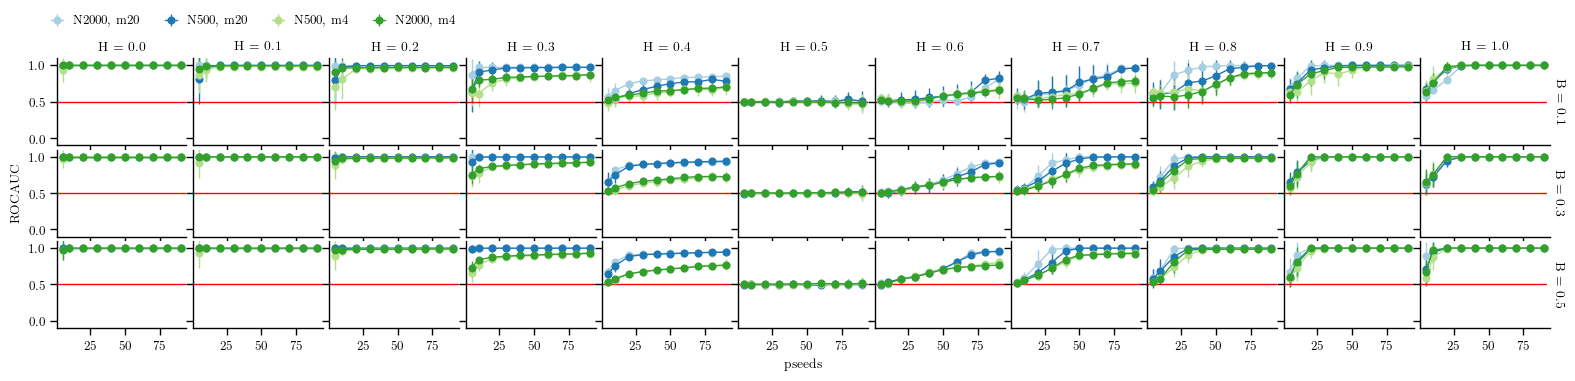

In [7]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_N_m(df_rq1, columns, fn=fn)

<h3>Regression to the mean global performance</h3>

In [8]:
y_observed = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"y_observed.pickle"))
fe_params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"fe_params.pickle"))
random_effects = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"random_effects.pickle"))
mdf = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"mdf.pickle"))
params = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"params.pickle"))
X = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"X.pickle"))
Y = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Y.pickle"))
Z = io.load_pickle(os.path.join(OUTPUT_MIXED_EFFECTS,"Z.pickle"))

../results-batch/mixed_effects/y_observed.pickle loaded!
../results-batch/mixed_effects/fe_params.pickle loaded!
../results-batch/mixed_effects/random_effects.pickle loaded!
../results-batch/mixed_effects/mdf.pickle loaded!
../results-batch/mixed_effects/params.pickle loaded!
../results-batch/mixed_effects/X.pickle loaded!
../results-batch/mixed_effects/Y.pickle loaded!
../results-batch/mixed_effects/Z.pickle loaded!


In [9]:
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: rocauc   
No. Observations: 2030    Method:             REML     
No. Groups:       110     Scale:              0.0025   
Min. group size:  12      Likelihood:         2887.6440
Max. group size:  59      Converged:          Yes      
Mean group size:  18.5                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.769    0.017 43.970 0.000  0.735  0.803
N             0.000    0.000 10.559 0.000  0.000  0.000
density       0.635    0.050 12.815 0.000  0.538  0.732
B             0.100    0.007 14.593 0.000  0.087  0.114
Group Var     0.032    0.089                           
=======================================================

"""

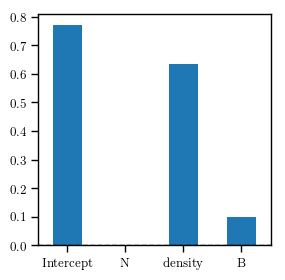

In [10]:
fn = None
viz.plot_fixed_effects(fe_params, fn)

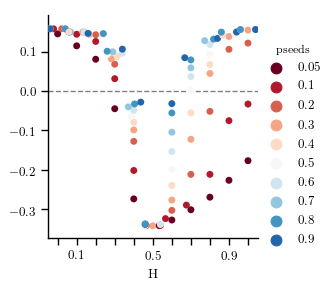

In [11]:
fn = None
viz.plot_random_effects(random_effects, params['group_vars'], fn)

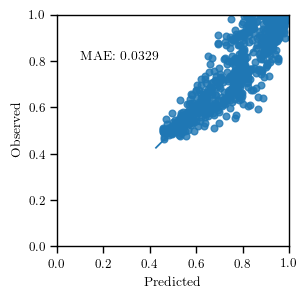

In [12]:
fn = None
viz.plot_fitted_line(mdf, y_observed, fn)

The MSE of LMM is 0.002366859495608517
The RMSE of LMM is 0.04865038022059558
The MAE of LMM is 0.03287359123461675


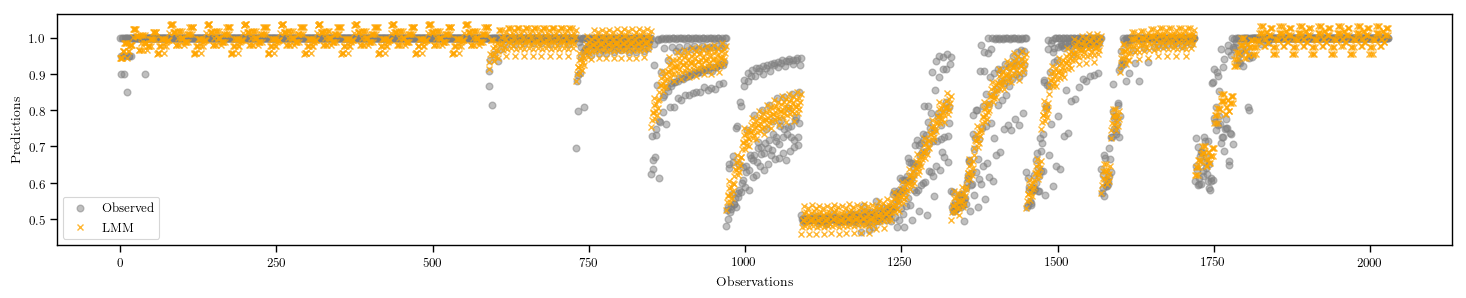

In [13]:
fn = None
viz.plot_prediction(X, Y, Z, fe_params, random_effects, fn)

<h3>Prediction on Empirical Networks</h3>

Datasets

In [16]:
df_evalues = empirical.load_evalues(OUTPUT)
df_empirical = empirical.get_summary_datasets(DATAPATH, df_evalues, output=OUTPUT)
df_empirical

,dataset,N,m,class,minority,B,E,density,Emm,EMM,EmM,gammam,gammaM,Hmm,HMM
0,Caltech36,701,1,gender,1,0.325250,15464,0.063028,2351,3413,9700,4.656218,3.526275,0.64,0.43
1,Escorts,16730,1,role,escort,0.395935,39044,0.000279,0,19423,19621,2.477017,4.397491,0.00,0.00
2,GitHub,37700,1,mltarget,1,0.258329,289003,0.000407,19684,21280,248039,2.658579,2.538155,0.68,1.00
3,Swarthmore42,1519,1,gender,2,0.492429,53726,0.046600,13689,12474,27563,4.997918,4.985283,0.48,0.56
4,USF51,1705,1,gender,2,0.404106,15597,0.010737,1798,4598,9201,3.683327,4.631682,0.43,0.45
5,Wikipedia,2132,1,gender,female,0.153377,3143,0.001384,125,294,2724,3.610080,2.825921,0.74,0.54


Prediction using Mixed-Effects

In [17]:
sampling = 'nodes'
tmp = df_results.query("kind=='empirical' & sampling==@sampling").copy()
tmp = prediction.setup(tmp)
df_prediction = prediction.predict_allrows(tmp, mdf, params)
del(tmp)

In [18]:
sampling = 'nodes'
df_realworld = df_results.query("dataset!='-' & sampling==@sampling").copy()
df_realworld = df_realworld.append(df_prediction[df_realworld.columns], ignore_index=True)

df_realworld.loc[:, 'B'] = df_realworld.B.round(2)
df_realworld.loc[:, 'H'] = df_realworld.H.round(2)
df_realworld.sample(5)

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
3396,BAH,Swarthmore42,207,2,0.046621,0.49,0.52,0.54,0.51,5.0,...,-0.061056,0.061056,0.076628,0.000889,0.000889,5.871904e-03,0.003728,0.002144,0.009600,0.010489
2011,BAH,Caltech36,178,2,0.063036,0.33,0.54,0.63,0.44,2.0,...,-0.030897,0.030897,0.079986,0.000349,0.000349,6.397688e-03,0.000955,0.005443,0.007352,0.007701
2043,BAH,Caltech36,178,2,0.063036,0.33,0.54,0.63,0.44,2.0,...,0.149989,-0.149989,-0.000441,0.007399,0.007399,1.943908e-07,0.022497,-0.022496,0.022497,0.029896
1668,BAH,GitHub,9830,2,0.000407,0.26,0.84,0.68,1.00,3.0,...,0.001596,-0.001596,-0.019620,0.000104,0.000104,3.849495e-04,0.000003,0.000382,0.000387,0.000492
3953,LME,USF512009,1705,1,0.010737,0.40,0.44,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


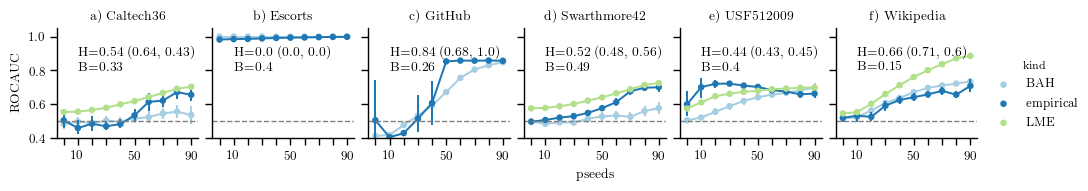

In [20]:
fn = None #os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_pseeds_{}_empirical_vs_models_RUNS{}.pdf'.format(sampling, EPOCHS))
viz.plot_model_vs_data(df_realworld, fn) 

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [ ]:
df_rq2 = df_results.query("kind=='BAH' & N==2000 & m==4 & H in [0.2, 0.5, 0.8]")
df_rq2.head()

<h3>Global performance</h3>

In [ ]:
fn = None
viz.plot_rocauc_vs_pseeds_per_H_B_sampling(df_rq2, columns, fn=fn)

<h3>Quality of estimation</h3>

In [ ]:
fn = None
viz.plot_SEp1_vs_SEcpDiff_per_H_B_sampling(df_rq2, columns, fn)

<h3>Utility of estimation</h3>

In [ ]:
fn = None
viz.plot_rocauc_vs_SE_per_H_B_sampling(df_rq2, columns, fn)

<h3>Comparison of estimation errors per sample method (small samples)</h3>

In [ ]:
# Available metrics:
# --------------------------------------------------------------------------
## Estimation error: estimated - observed
# - 'EEp1','EEp0',      # prior error
# - 'EEcp00','EEcp10',  # conditional prob. x given majority error
# - 'EEcp11','EEcp01',  # conditional prob. x given minority error
## Squared Error: (estimated - observed)^2
# - 'SEp1',
# - 'SEcp00',
# - 'SEcp11',
## Overall Errors
# - 'SEcpDiff', # Diff of the 2 cp SE
# - 'SEcpSum',  # Sum of all 2 cp SE
# - 'SE',       # sum of all 3 SE


In [ ]:
pseeds = 0.4
B = 0.1 # unbalanced
#B = 0.5 # balanced

In [ ]:
# Heterophilic
H = 0.2
fn = None
viz.plot_estimation_errors_per_rocauc_sampling(df_rq2.query('pseeds<@pseeds & H==@H & B==@B'), columns, 
                                               metricx='EEcp11', metricy='EEcp00', fn=fn)

In [ ]:
# Homophilic
H = 0.8
fn = None
viz.plot_estimation_errors_per_rocauc_sampling(df_rq2.query('pseeds<@pseeds & H==@H & B==@B'), columns, 
                                               metricx='EEcp11', metricy='EEcp00', fn=fn)

<h3>Comparison of estimation errors per netwok (small samples)</h3>

In [ ]:
all_sampling_methods = False
fn = None
viz.plot_estimation_error_per_H_B_rocauc(df_rq2, columns, 'SEcpSum', 'SEp1', pseeds, all_sampling_methods, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [ ]:
df_rq3 = df_results.query("kind=='BAH' & dataset=='-' & N==2000 & m==4 & H in [0.2, 0.5, 0.8] & pseeds < 0.4")
df_rq3.head()

<h3>Performance Bias</h3>

In [ ]:
fn = None
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)